In [34]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
from scipy.cluster.hierarchy import linkage 
from	sklearn.cluster	import	AgglomerativeClustering 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import xlrd
import ast

In [28]:
airlines = pd.read_excel('EastWestAirlines.xlsx')

In [29]:
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [30]:
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [47]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [49]:
df_norm = norm_func(airlines.iloc[:,1:])
df_norm.head(10)

,Bonus_miles,Bonus_trans,ID#,Balance,Qual_miles,cc1_miles,cc2_miles
0,-0.702698,-1.103926,-1.734908,-0.451084,-0.186275,-0.769482,-0.098230
1,-0.701001,-0.999801,-1.734047,-0.539389,-0.186275,-0.769482,-0.098230
2,-0.539185,-0.791550,-1.733185,-0.319991,-0.186275,-0.769482,-0.098230
3,-0.689200,-1.103926,-1.732324,-0.583726,-0.186275,-0.769482,-0.098230
4,1.082986,1.499207,-1.731462,0.239648,-0.186275,1.409295,-0.098230
5,-0.709903,-1.208052,-1.730601,-0.567412,-0.186275,-0.769482,-0.098230
6,0.428022,1.395082,-1.729739,0.112256,-0.186275,0.683036,-0.098230
7,-0.492520,-0.791550,-1.728878,-0.523393,-0.186275,-0.769482,-0.098230
8,-0.637318,3.269338,-1.728016,3.665584,-0.186275,0.683036,6.674532
9,0.467110,1.707458,-1.727155,0.310181,-0.186275,0.683036,-0.098230


In [50]:
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x24196a5cd08>,
 <a list of 13 Text xticklabel objects>)

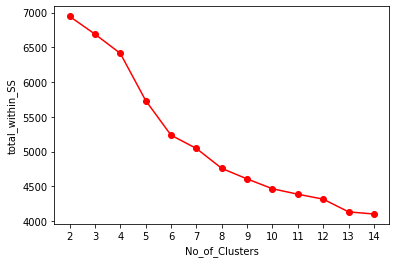

In [51]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [52]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
airlines['clust']=md # creating a  new column and assigning it to new column 

In [58]:
df_norm.head()

,Bonus_miles,Bonus_trans,ID#,Balance,Qual_miles,cc1_miles,cc2_miles
0,-0.702698,-1.103926,-1.734908,-0.451084,-0.186275,-0.769482,-0.09823
1,-0.701001,-0.999801,-1.734047,-0.539389,-0.186275,-0.769482,-0.09823
2,-0.539185,-0.791550,-1.733185,-0.319991,-0.186275,-0.769482,-0.09823
3,-0.689200,-1.103926,-1.732324,-0.583726,-0.186275,-0.769482,-0.09823
4,1.082986,1.499207,-1.731462,0.239648,-0.186275,1.409295,-0.09823


In [55]:
airlines = airlines.iloc[:,[7,0,1,2,3,4,5,6]]

In [59]:
airlines.iloc[:,1:9].groupby(airlines.clust).mean()

,cc3_miles,Bonus_miles,Bonus_trans,ID#,Balance,Qual_miles,cc1_miles,clust
clust,,,,,,,,
0,1.000742,6858.047513,8.858203,1078.951745,61001.027468,63.293244,1.447661,0
1,1.041082,48543.334669,21.166333,1583.471944,140493.299599,84.538076,4.041082,1
2,1.004531,5842.929450,7.562460,3102.338511,38571.945631,40.776699,1.341100,2
3,1.000000,14689.837209,17.534884,2269.372093,68876.581395,23.255814,1.139535,3
4,1.000000,18472.924242,13.666667,2013.848485,142358.530303,5192.257576,2.000000,4


In [60]:
airlines.to_csv("airlines.csv")